In [1]:
# These packages are used in module LLT but not included in MomentumED package. 
# Use the following to add it:
# using Pkg; Pkg.add("ClassicalOrthogonalPolynomials"); Pkg.add("QuadGK")

include("Landau level triangular.jl")
using .LLT

In [2]:
# Use the following to add it:
# using Pkg; Pkg.add("CairoMakie")
using CairoMakie # for plotting
CairoMakie.activate!()

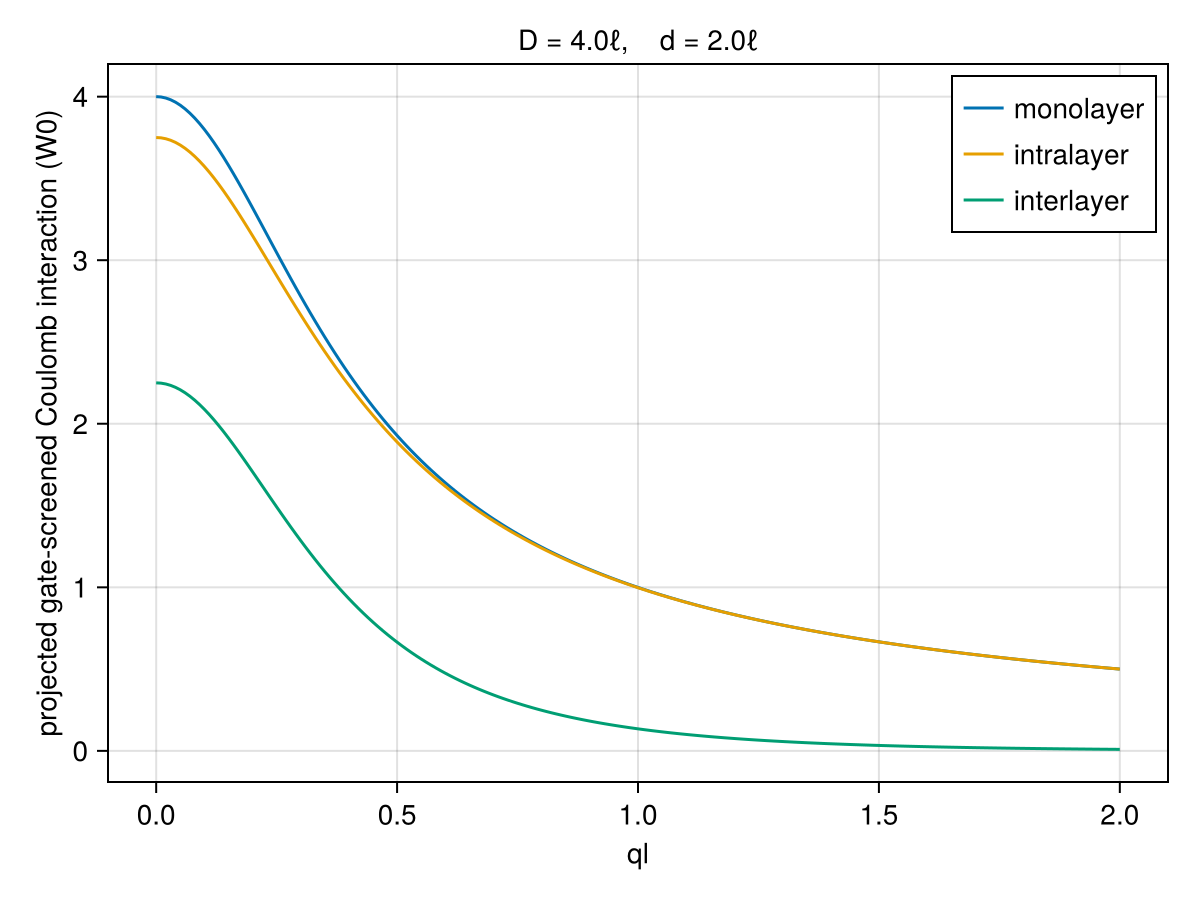

In [3]:
# define and plot Coulomb (no form factor exp(-0.5*q²l²) )
LLT.W0 = 1.0                   # Interaction strength (energy units)
LLT.D_l = 4.0                 # Screening length D/l
LLT.d_l = 2.0                  # Inter-layer distance d/l

ql = 0:0.01:2

fig = Figure();
ax = Axis(fig[1,1];
    xlabel = "ql", ylabel = "projected gate-screened Coulomb interaction (W0)",
    subtitle = "D = $(round(LLT.D_l, digits = 3))ℓ,    d = $(round(LLT.d_l, digits = 3))ℓ"
)
lines!(ax, ql, LLT.V_Coulomb.(ql./LLT.Gl, 0.0; d_l = 0.0, form_factor = false)./LLT.W0, label = "monolayer")
lines!(ax, ql, LLT.V_Coulomb.(ql./LLT.Gl, 0.0, same_layer = true , form_factor = false)./LLT.W0, label = "intralayer")
lines!(ax, ql, LLT.V_Coulomb.(ql./LLT.Gl, 0.0, same_layer = false, form_factor = false)./LLT.W0, label = "interlayer")
axislegend(ax, position = :rt)
fig

mono_Vm[1:5] = [1.4387306666696165, 0.5642744272128494, 0.3535399998383968, 0.25274655146551955, 0.19275200971107534]
intra_Vm[1:5] = [1.4092896170330855, 0.5392850346706811, 0.33217688466985185, 0.23436443553534425, 0.17684093782808377]
inter_Vm[1:5] = [0.42872231066982697, 0.3035083908125457, 0.22730186863709992, 0.1770488833697307, 0.14189548311132608]


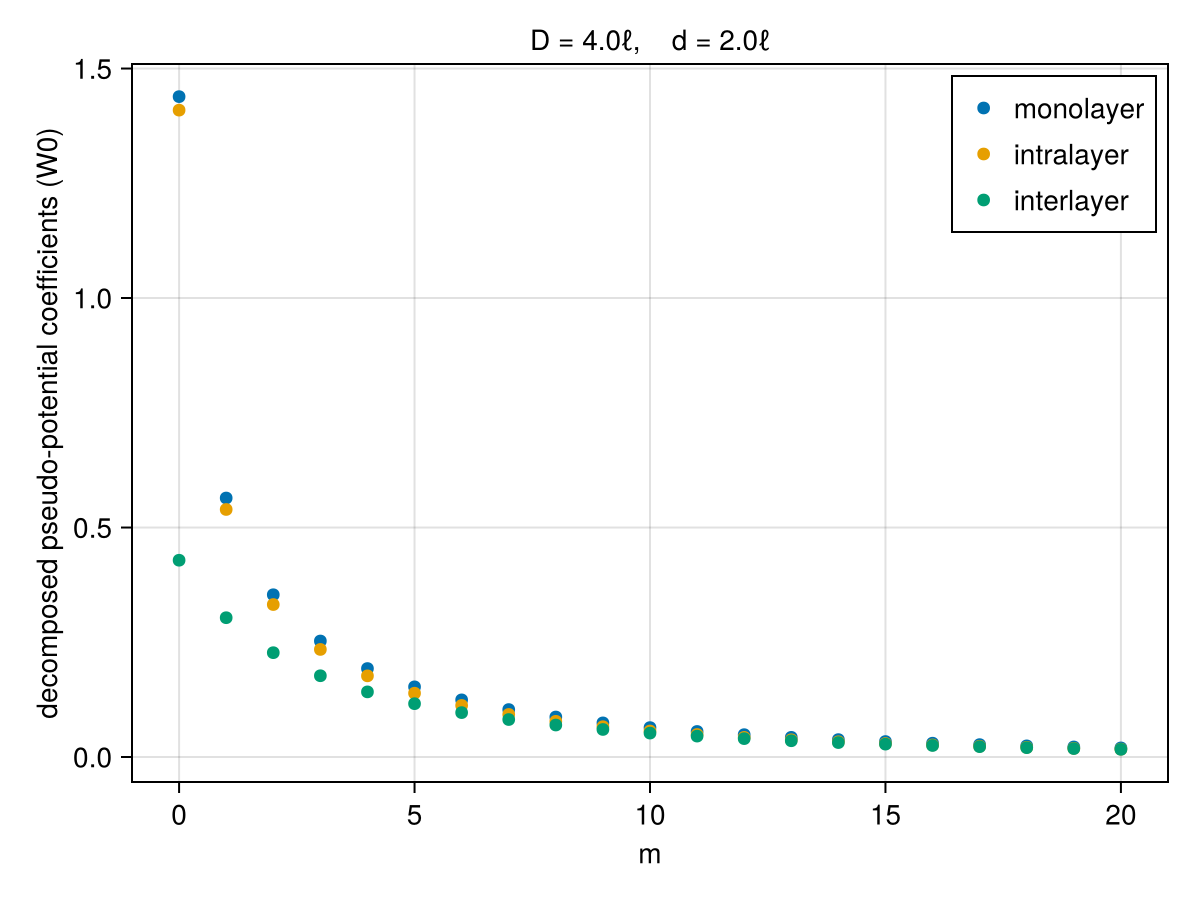

In [4]:
m_list = 0:20

mono_Vm  = LLT.pseudo_potential_decomposition.(m_list; d_l = 0.0)
intra_Vm = LLT.pseudo_potential_decomposition.(m_list; same_layer = true)
inter_Vm = LLT.pseudo_potential_decomposition.(m_list; same_layer = false)

@show mono_Vm[1:5]
@show intra_Vm[1:5]
@show inter_Vm[1:5]


fig = Figure();
ax = Axis(fig[1,1];
    xlabel = "m", ylabel = "decomposed pseudo-potential coefficients (W0)",
    subtitle = "D = $(round(LLT.D_l, digits = 3))ℓ,    d = $(round(LLT.d_l, digits = 3))ℓ"
)
scatter!(ax, m_list,  mono_Vm, label = "monolayer")
scatter!(ax, m_list, intra_Vm, label = "intralayer")
scatter!(ax, m_list, inter_Vm, label = "interlayer")
axislegend(ax, position = :rt)
fig